In this notebook I train a simple simple naive bayes model with Bernoulli distribution on the text data of the training dataset.
It will work as a benchamrk for future work.

In [ ]:
#conda install -c conda-forge kaggle

In [ ]:
import kaggle

In [3]:
!kaggle competitions download -c nlp-getting-started


  0%|          | 0.00/593k [00:00<?, ?B/s]
100%|##########| 593k/593k [00:00<00:00, 3.26MB/s]


In [9]:
# CARGAMOS LOS PAQUETES EMPLEADOS

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import collections
#import gspread
import zipfile

from collections import Counter

from datetime import datetime

#from google.colab import auth
#import gspread
#from oauth2client.client import GoogleCredentials
from sklearn.feature_extraction.text import CountVectorizer

#def next_available_row(sheet, cols_to_sample=2):
#  # looks for empty row based on values appearing in 1st N columns
#  cols = sheet.range(1, 1, sheet.row_count, cols_to_sample)
#  return max([cell.row for cell in cols if cell.value]) + 1

In [133]:
#pd.options.display.max_rows
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_rows', 60)

#pd.options.display.max_colwidth
pd.set_option('display.max_colwidth', None)
#pd.set_option('display.max_colwidth', 50)

ValueError: Value must have type '<class 'int'>'


# Data download

In [98]:
zf = zipfile.ZipFile('nlp-getting-started.zip') 
train = pd.read_csv(zf.open('train.csv'))
test = pd.read_csv(zf.open('test.csv'))

train_y=train['target'].copy()

data = train\
    .drop(columns='target')\
    .append(test,ignore_index=True)

In [ ]:
# alternative load files downloaded to local computer

#train = pd.read_csv('train.csv')
#test = pd.read_csv('test.csv')

In [106]:
data.head()

,id,keyword,location,text
0,1,NaN,NaN,our deeds are the reason of this earthquake ma...
1,4,NaN,NaN,forest fire near la ronge sask canada
2,5,NaN,NaN,all residents asked to shelter in place are be...
3,6,NaN,NaN,13000 people receive wildfires evacuation orde...
4,7,NaN,NaN,just got sent this photo from ruby alaska as s...


# Text processing

In [105]:
#   PROCESAMIENTO INICIAL DE LOS DATOS

################################################################################
################################################################################

#   LIMPIEZA DE textS

data['text']=data['text'].str.replace('\n','')

data['text']=data['text'].str.lower()
data['text']=data['text'].str.replace(',','').str.replace('.','').str.replace('!','').str.replace('?','').str.replace('¡','').str.replace('¿','')
data['text']=data['text'].str.replace('#','').str.replace("'",'')
data['text']=data['text'].str.replace('\n','')
data['text']=data['text'].str.replace('ã©','é').str.replace('ã¡','á').str.replace('ã³','ó').str.replace('ã±','ñ').str.replace('ãº','ú').str.replace('ã','í')
data['text'] = data['text'].fillna('')


In [49]:
from nltk.corpus import stopwords

In [107]:
#   CARGA UNA LISTA DE PALABRAS INUTILES Y LOS PAQUETES DE STEMMING

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
palabras_inutiles = stopwords.words('english')

# tarda ~40 seg

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hfgr1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [118]:
import spacy

#import spacy.cli

#spacy.cli.download("en_core_web_sm")
import en_core_web_sm
nlp_en_sm = en_core_web_sm.load()

In [120]:
#   APLICA LOS PAQUETES DE STEMMING EN LA COLUMNA DE textS

# tarda ~580 seg

for i in range(data.shape[0]):
  
  auxiliar = nlp_en_sm(data['text'][i])
  data['text'][i]= ' '.join([tok.lemma_.lower() for tok in 
                              auxiliar
                              ])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [140]:
data['text']=data['text'].str.replace('-pron-','').str.replace('://tco','').str.replace('/','').str.replace('=','').str.replace('>','').str.replace('<','').str.replace(':','')

# Model selection

In [142]:
#   genera base de variables indicadoras por palabra
#def base_vec_palabras(OPS,col_palabras,col_animo,animo):

  # X es una matriz
vectorizer=CountVectorizer()
X = vectorizer.fit_transform(data['text'].values.astype('U'))
  # lista de palabras
lista_palabras = vectorizer.get_feature_names()
  # pasa X a un df
df_palabras = pd.DataFrame(X.toarray(),
                   columns=lista_palabras)

In [143]:
  #  conteo de palabras
conteo_lista_palabras = df_palabras.sum(axis = 0, skipna = True)
  # quito las que casi no ocurren
conteo_lista_palabras_2 = conteo_lista_palabras.where(conteo_lista_palabras>=10).dropna()
  # aux_palabras = aux_palabras.where(aux_palabras<17).dropna()
  # quito las que sean muy cortas
conteo_lista_palabras_3 = conteo_lista_palabras_2.iloc[np.where(pd.Series(
                                                          [len(omg) for omg in conteo_lista_palabras_2.index.values.tolist()]
                                                          )>2)]
  # subset de utiles
lista_palabras_subset = list(
    set(conteo_lista_palabras_3.index.values.tolist()
    ).difference(
        set(palabras_inutiles)
    ))

freqs=conteo_lista_palabras_3[lista_palabras_subset]

In [150]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

#by_multi = BernoulliNB(alpha=1)
#cross_val_score(by_multi,np.array(df_palabras[lista_palabras_subset][:(train.shape[0])]), train['target'], cv=10).mean()

0.6936751750140264

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


10.6936751750140264


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


20.7077359662403048


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


30.7146996230077686


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


40.7190361940269647


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


50.7244214293825938


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


60.725078630698776


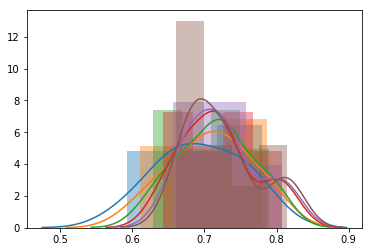

In [155]:
for j in [1,2,3,4,5,6]:

  by_multi = BernoulliNB(alpha=j)
  # by_multi.fit(arreglo_train,OPSS['razon_animo'][:30000])
  # prediccion=by_multi.predict(arreglo_test).tolist()

  aux=cross_val_score(by_multi,np.array(df_palabras[lista_palabras_subset][:(train.shape[0])]), train['target'], cv=10)
  sns.distplot(aux)
  print(str(j) + str(aux.mean()))

  del aux

  # conteo = 0
  # for i in range(len(real)):
  #   if real[i]==prediccion[i]:
  #     conteo+=1
  # print(conteo)


# Final selection and submission

In [156]:
by_multi = BernoulliNB(alpha=3)
by_multi.fit( np.array(df_palabras[lista_palabras_subset][:(train.shape[0])]), train['target'])
prediccion=by_multi.predict(np.array(df_palabras[lista_palabras_subset][(train.shape[0]):])).tolist()

In [177]:
pd.DataFrame( data = { 'id':test['id'], 'target': prediccion  }).to_csv('bernoulli_bayes_submission.csv',index=False)

In [178]:
!kaggle competitions submit nlp-getting-started -f bernoulli_bayes_submission.csv -m "Bernoulli naive bayes basic model application"

Successfully submitted to Natural Language Processing with Disaster Tweets



  0%|          | 0.00/25.4k [00:00<?, ?B/s]
 31%|###1      | 8.00k/25.4k [00:00<00:00, 36.7kB/s]
100%|##########| 25.4k/25.4k [00:01<00:00, 23.8kB/s]
